In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


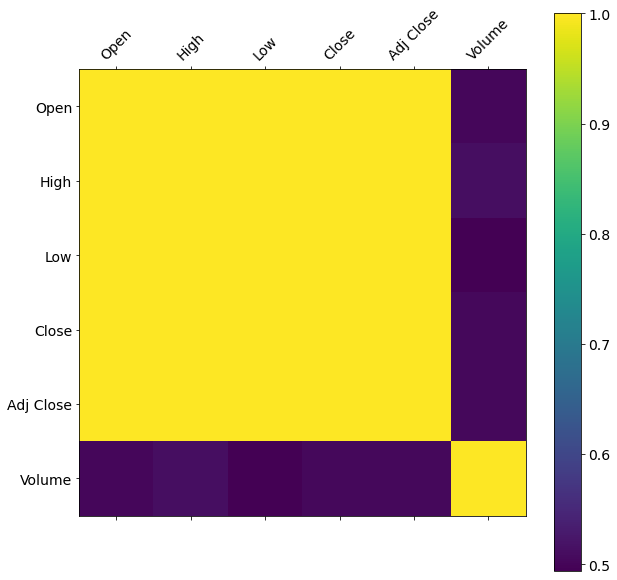

In [5]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [6]:
df.drop(["Date", "Adj Close", "Volume"], axis=1, inplace=True)

In [7]:
for i in range(1, 6):
    df[f"Prev Open - {i}"] = df["Open"].shift(i)
    df[f"Prev High - {i}"] = df["High"].shift(i)
    df[f"Prev Low - {i}"] = df["Low"].shift(i)
    df[f"Prev Close - {i}"] = df["Close"].shift(i)

In [8]:
df.dropna(axis=0, inplace=True)
df.head()

,Open,High,Low,Close,Prev Open - 1,Prev High - 1,Prev Low - 1,Prev Close - 1,Prev Open - 2,Prev High - 2,Prev Low - 2,Prev Close - 2,Prev Open - 3,Prev High - 3,Prev Low - 3,Prev Close - 3,Prev Open - 4,Prev High - 4,Prev Low - 4,Prev Close - 4,Prev Open - 5,Prev High - 5,Prev Low - 5,Prev Close - 5
5,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.100000,18.709999,19.200001,25.000000,25.920000,20.270000,21.959999,25.790001,30.420000,23.299999,23.830000,19.000000,25.00,17.540001,23.889999
6,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.100000,18.709999,19.200001,25.000000,25.920000,20.270000,21.959999,25.790001,30.42,23.299999,23.830000
7,17.580000,17.900000,16.549999,17.400000,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.100000,18.709999,19.200001,25.000000,25.92,20.270000,21.959999
8,17.950001,18.070000,17.000000,17.049999,17.580000,17.900000,16.549999,17.400000,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.10,18.709999,19.200001
9,17.389999,18.639999,16.900000,18.139999,17.950001,18.070000,17.000000,17.049999,17.580000,17.900000,16.549999,17.400000,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.00,15.830000,16.110001


In [9]:
df["Future"] = df["Close"].shift(-1)
df.dropna(axis=0, inplace=True)
df.head()

,Open,High,Low,Close,Prev Open - 1,Prev High - 1,Prev Low - 1,Prev Close - 1,Prev Open - 2,Prev High - 2,Prev Low - 2,Prev Close - 2,Prev Open - 3,Prev High - 3,Prev Low - 3,Prev Close - 3,Prev Open - 4,Prev High - 4,Prev Low - 4,Prev Close - 4,Prev Open - 5,Prev High - 5,Prev Low - 5,Prev Close - 5,Future
5,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.100000,18.709999,19.200001,25.000000,25.920000,20.270000,21.959999,25.790001,30.420000,23.299999,23.830000,19.000000,25.00,17.540001,23.889999,17.459999
6,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.100000,18.709999,19.200001,25.000000,25.920000,20.270000,21.959999,25.790001,30.42,23.299999,23.830000,17.400000
7,17.580000,17.900000,16.549999,17.400000,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.100000,18.709999,19.200001,25.000000,25.92,20.270000,21.959999,17.049999
8,17.950001,18.070000,17.000000,17.049999,17.580000,17.900000,16.549999,17.400000,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.000000,15.830000,16.110001,23.000000,23.10,18.709999,19.200001,18.139999
9,17.389999,18.639999,16.900000,18.139999,17.950001,18.070000,17.000000,17.049999,17.580000,17.900000,16.549999,17.400000,16.139999,17.520000,15.570000,17.459999,16.400000,16.629999,14.980000,15.800000,20.000000,20.00,15.830000,16.110001,19.840000


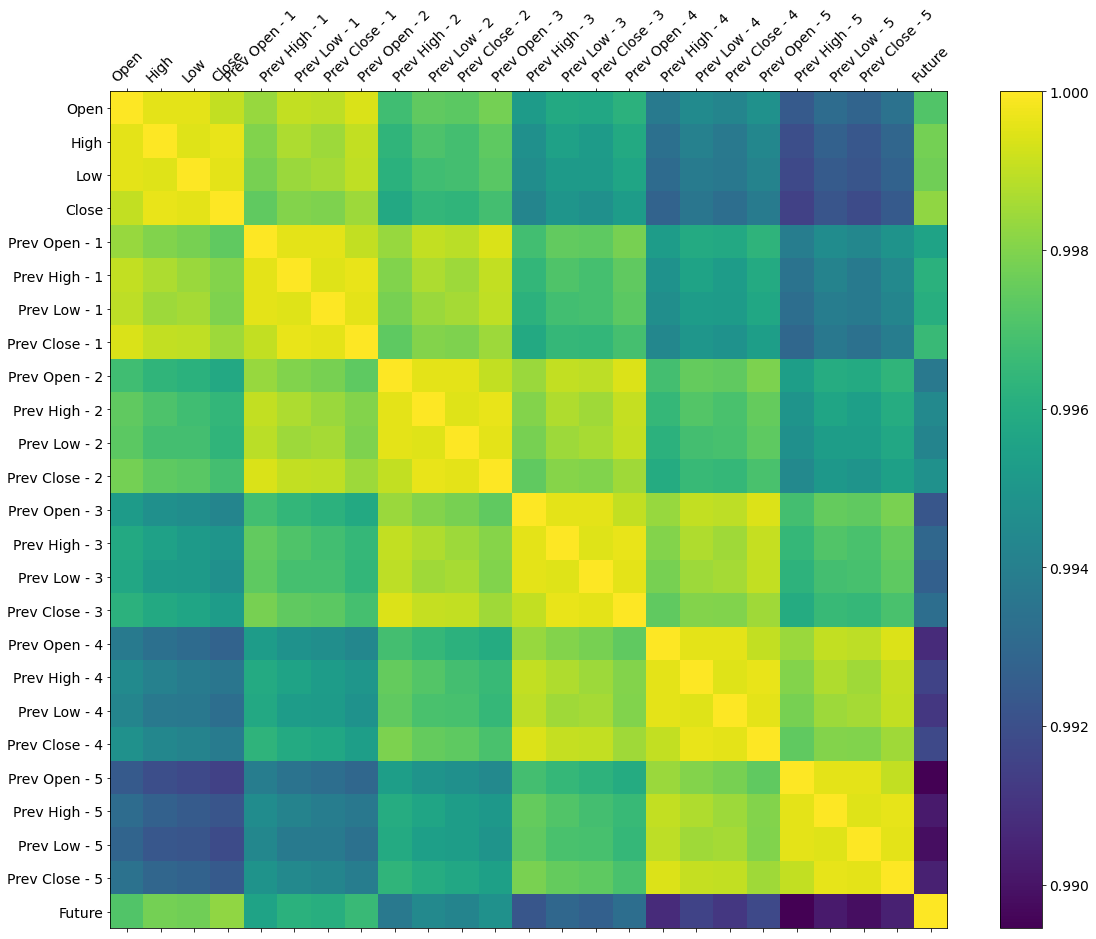

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [11]:
df.corr()["Future"]

Open              0.997149
High              0.997781
Low               0.997723
Close             0.998237
Prev Open - 1     0.995552
Prev High - 1     0.996199
Prev Low - 1      0.996072
Prev Close - 1    0.996604
Prev Open - 2     0.993714
Prev High - 2     0.994418
Prev Low - 2      0.994206
Prev Close - 2    0.994777
Prev Open - 3     0.992255
Prev High - 3     0.992989
Prev Low - 3      0.992675
Prev Close - 3    0.993250
Prev Open - 4     0.990758
Prev High - 4     0.991563
Prev Low - 4      0.991174
Prev Close - 4    0.991796
Prev Open - 5     0.989450
Prev High - 5     0.990193
Prev Low - 5      0.989822
Prev Close - 5    0.990409
Future            1.000000
Name: Future, dtype: float64

In [12]:
x = df.drop(["Future"], axis=1).values
y = df["Future"].values
x = np.array(x)
y = np.array(y)

In [13]:
train_size = int(0.7 * len(x))
train_x = x[:train_size]
train_y = y[:train_size]
test_x = x[train_size:]
test_y = y[train_size:]

In [14]:
train_size, len(train_x), len(train_y), len(test_x), len(test_y)

(1687, 1687, 1687, 723, 723)

In [15]:
train_x.shape, train_y.shape

((1687, 24), (1687,))

In [16]:
model = LinearRegression(n_jobs=-1, normalize=True)
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [17]:
model.score(test_x, test_y)

0.9679255587586608

In [18]:
predictions = []
for t in test_x:
    predictions.append(model.predict([t]))

In [19]:
len(predictions), len(test_x), len(test_y)

(723, 723, 723)

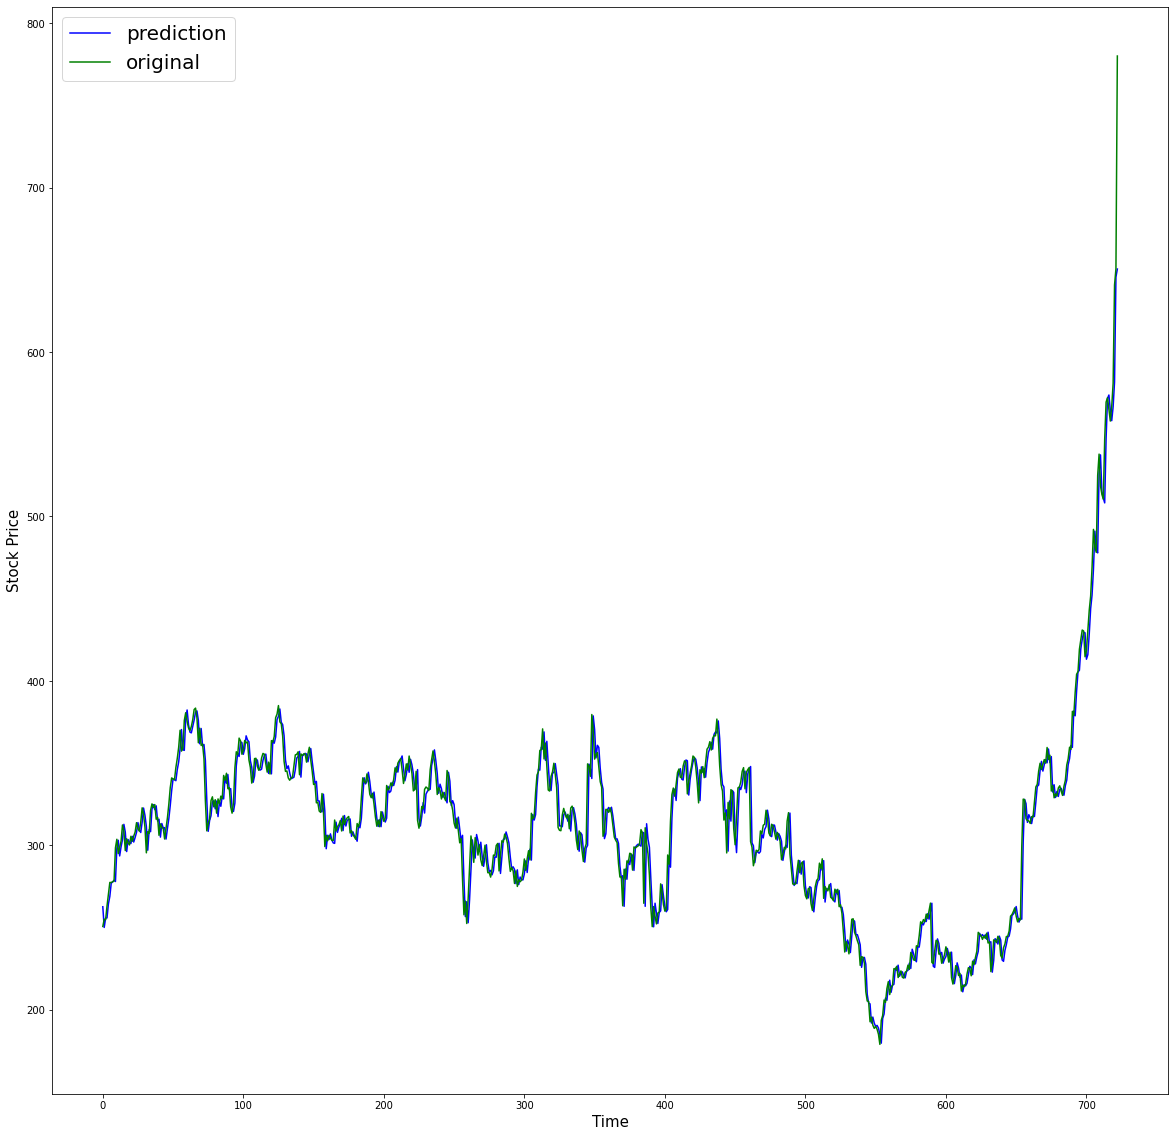

In [20]:
figure, axes = plt.subplots(figsize = (20, 20))
axes.plot(predictions, c="blue", label="prediction")
axes.plot(test_y, c="green", label="original")
axes.set_xlabel("Time", fontsize=15)
axes.set_ylabel("Stock Price", fontsize=15)
axes.legend(fontsize=20)